### Project - Ecommerce

project 12

In [3]:
import pandas as pd
df = pd.read_csv('EcomShipping.csv')
print(df.head(3))

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# Categoric data ie objects, and show their counts
df.describe(include = 'O')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [7]:
# pirnt out the categoric columns and its category
for c in df.select_dtypes(
    'object').columns.tolist():
    print(c, sorted(df[c].unique()))
# for c in df.select_dtypes(
#     exclude='number').columns.tolist():
#     print(c, sorted(df[c].unique()))

Warehouse_block ['A', 'B', 'C', 'D', 'F']
Mode_of_Shipment ['Flight', 'Road', 'Ship']
Product_importance ['high', 'low', 'medium']
Gender ['F', 'M']


In [ ]:
# Data Cleaning
# check missing data by msno()

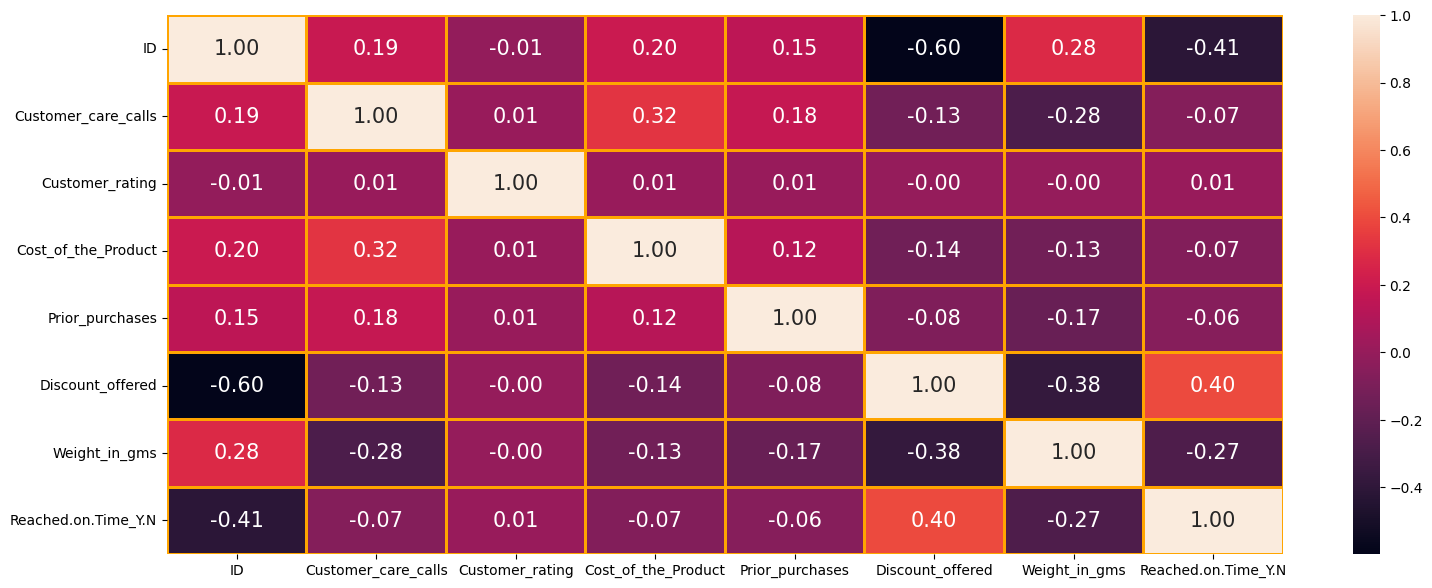

In [8]:
# Heatmap of the data
# Check correlation between features and target columns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18,7))
sns.heatmap(df.select_dtypes(include = 'number').corr(),
            annot=True, fmt='0.2f',
            annot_kws={'size':15},linewidth=2,
            linecolor='orange')
plt.show()

In [9]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

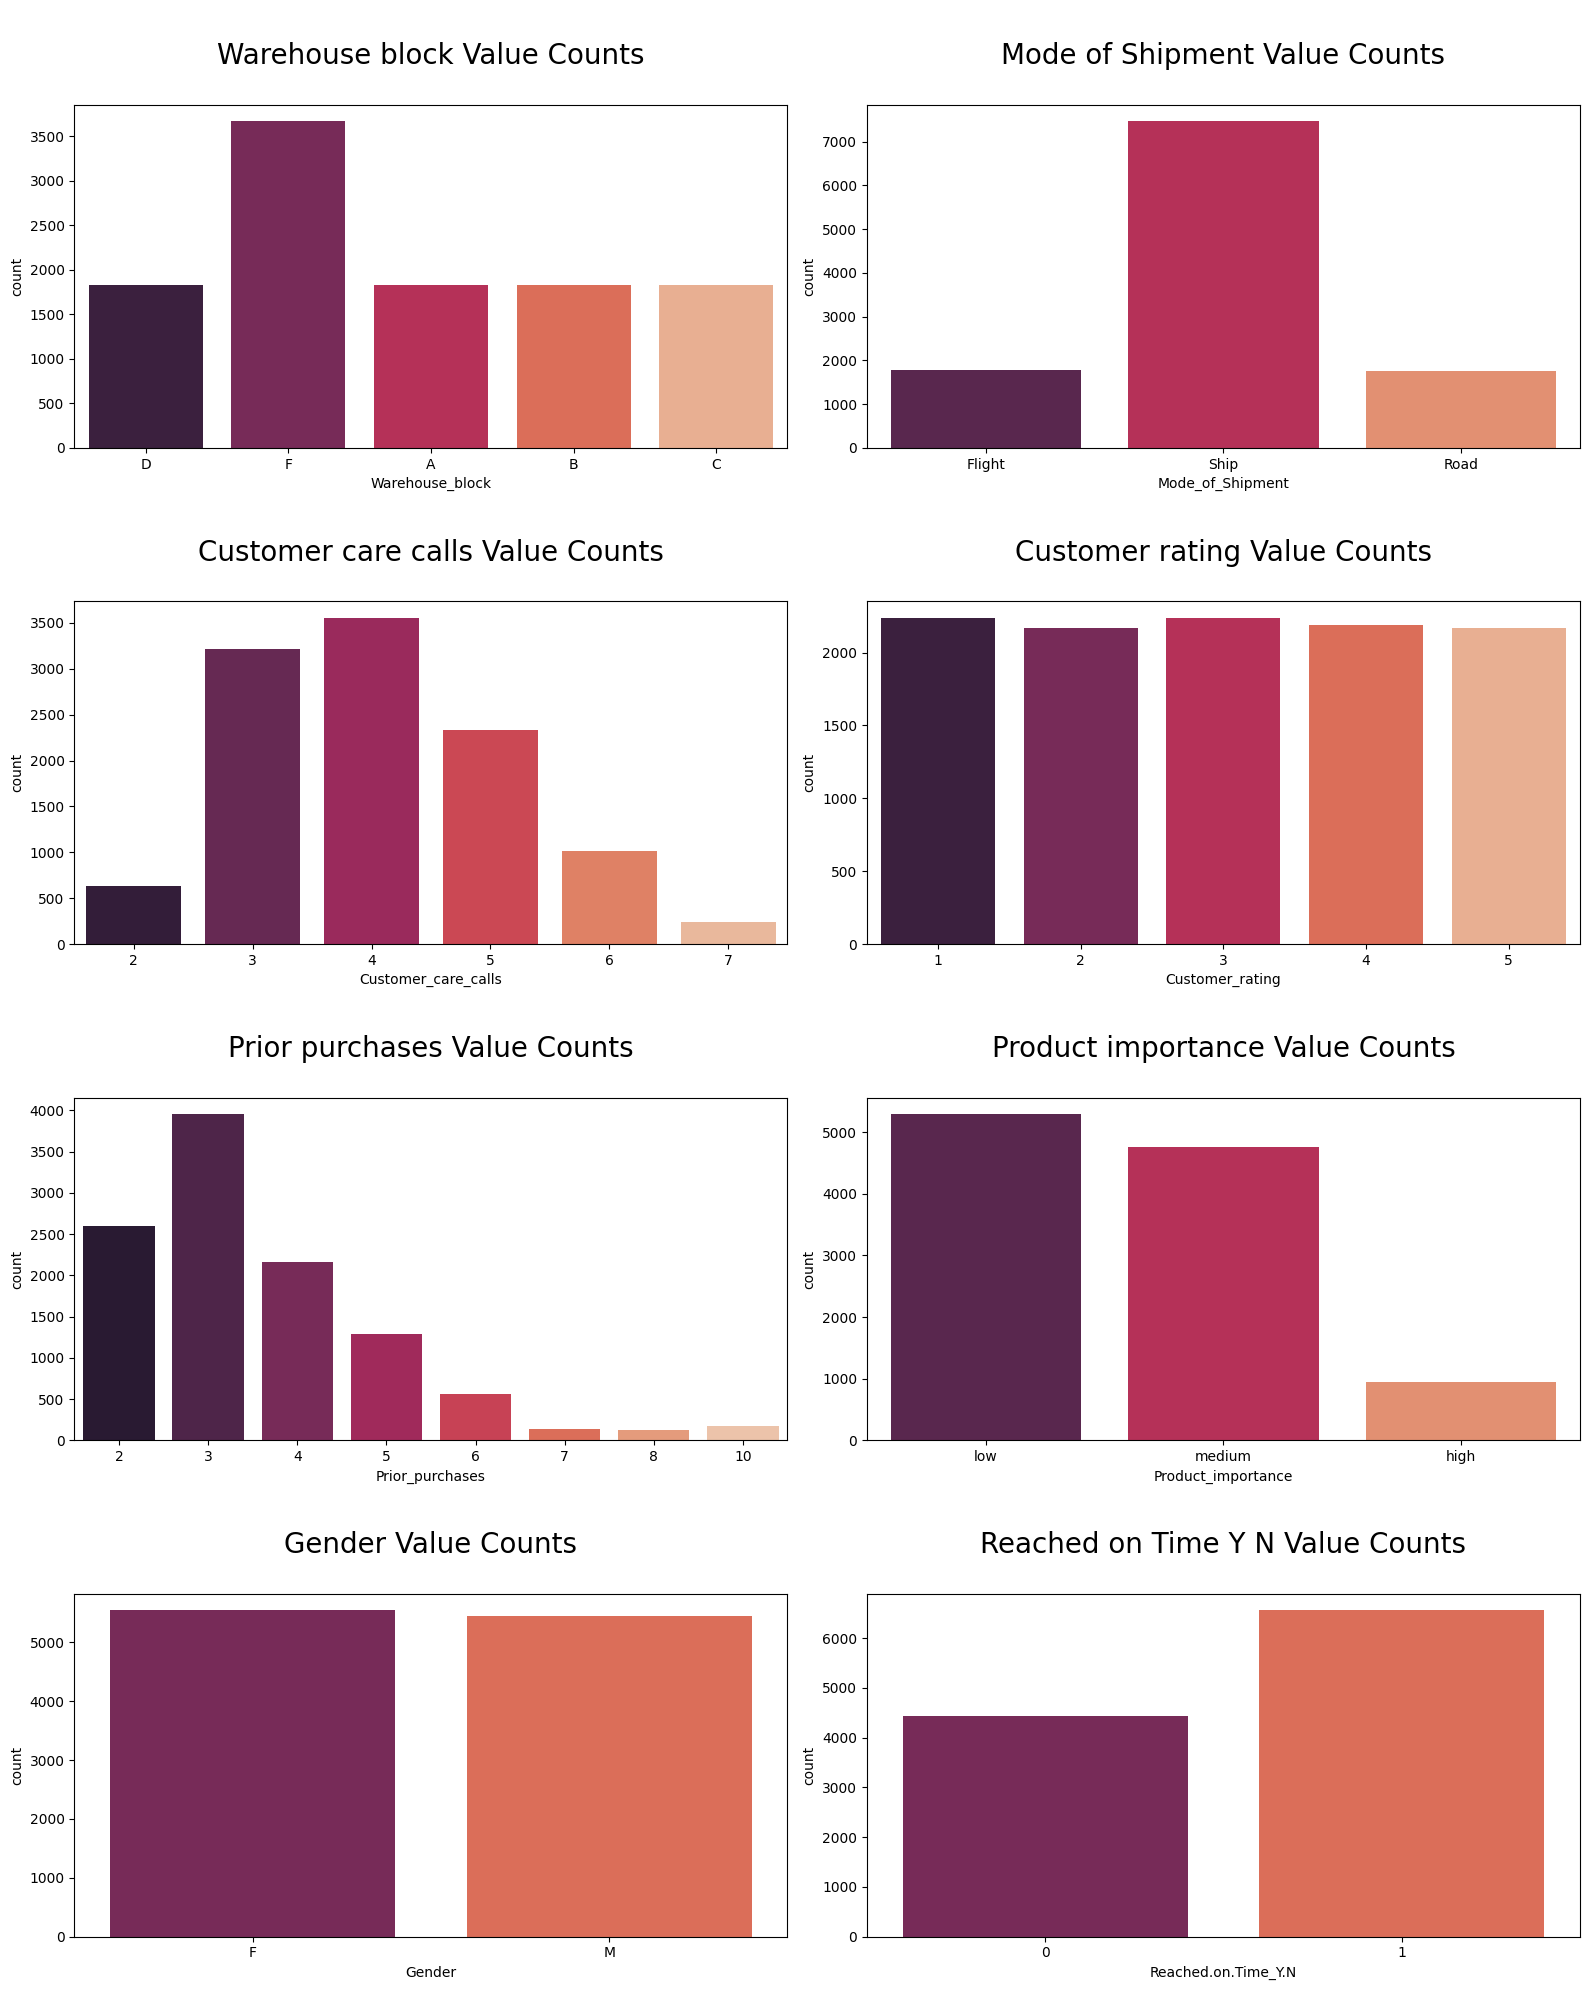

In [21]:
# create columns list to check
cols = ['Warehouse_block','Mode_of_Shipment',
       'Customer_care_calls','Customer_rating', 
       'Prior_purchases','Product_importance',
       'Gender','Reached.on.Time_Y.N']
plt.figure(figsize = (16,20))
### plot countplot
# countplot of each categorical column
# enumerate() add a counter
for i, col in enumerate(cols):
    if i <= 8: # 8 cols
        ax = plt.subplot(4,2,i+1)
        sns.countplot(x = col, data = df, ax = ax,
                      palette = 'rocket')
        col = col.replace('_',' ')
        col = col.replace('.',' ')
        plt.title(f"\n{col} Value Counts\n",fontsize=20)
plt.tight_layout()
plt.show()

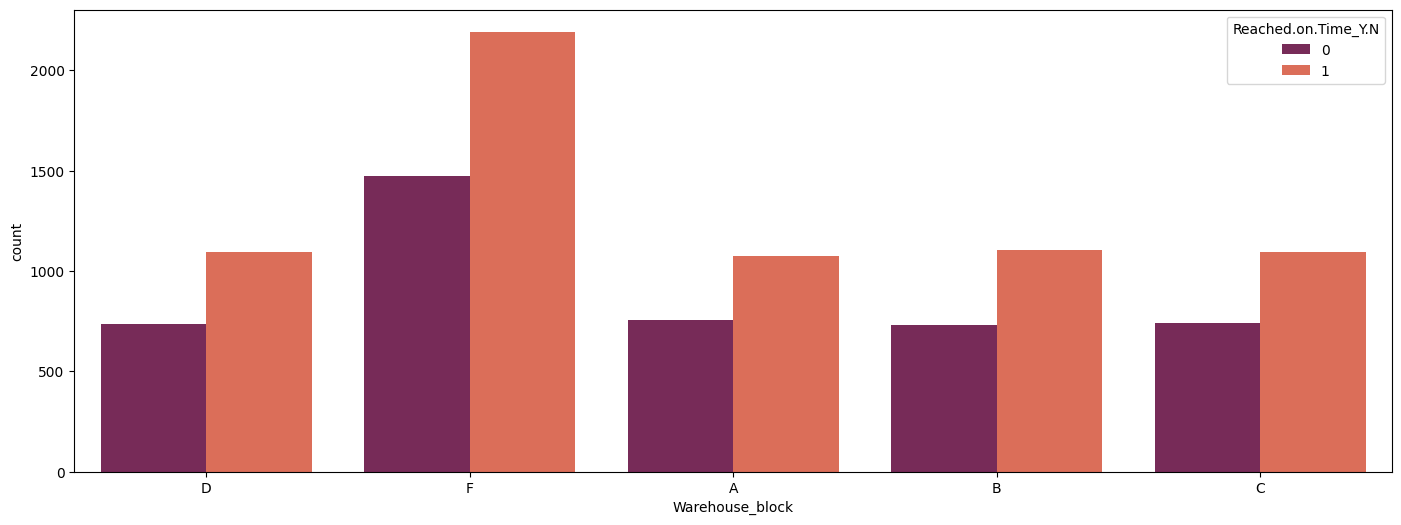

In [19]:
# Reach on time count in warehouse block
# 1: not on time 0: on time
plt.figure(figsize = (17,6))
sns.countplot(data = df, x = 'Warehouse_block',
              hue = 'Reached.on.Time_Y.N', palette = 'rocket')
plt.show()

In [24]:
# Shipment Method
import plotly.express as px
object_columns = df.select_dtypes(include= ['object'])
print(object_columns.head(3))
mode = object_columns['Mode_of_Shipment'].value_counts().reset_index()
mode.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(mode, names = 'Mode_of_Shipment', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu,
             width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

  Warehouse_block Mode_of_Shipment Product_importance Gender
0               D           Flight                low      F
1               F           Flight                low      M
2               A           Flight                low      M


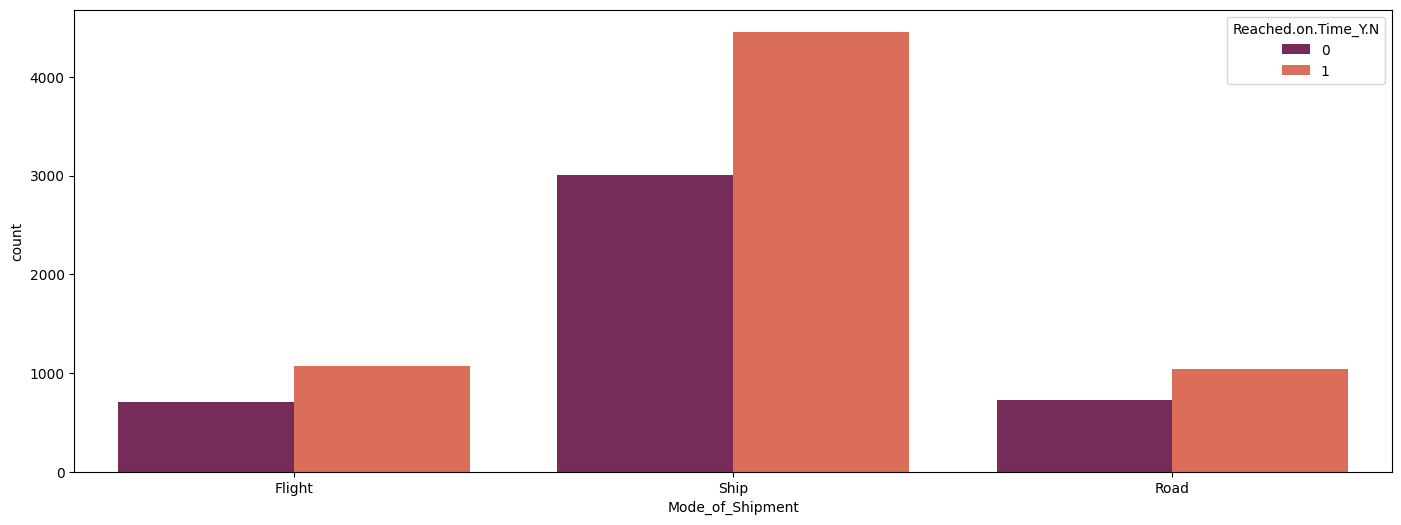

In [22]:
# Reach on time vs Shipping method
plt.figure(figsize = (17,6))
sns.countplot(data = df, x = 'Mode_of_Shipment',
              hue = 'Reached.on.Time_Y.N', palette = 'rocket')
plt.show()

In [27]:
# Product Importance
product_imp = object_columns['Product_importance'].value_counts().reset_index()
product_imp.columns = ['Product_importance', 'value_counts']
fig = px.pie(product_imp, names = 'Product_importance',
             values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu,
             width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

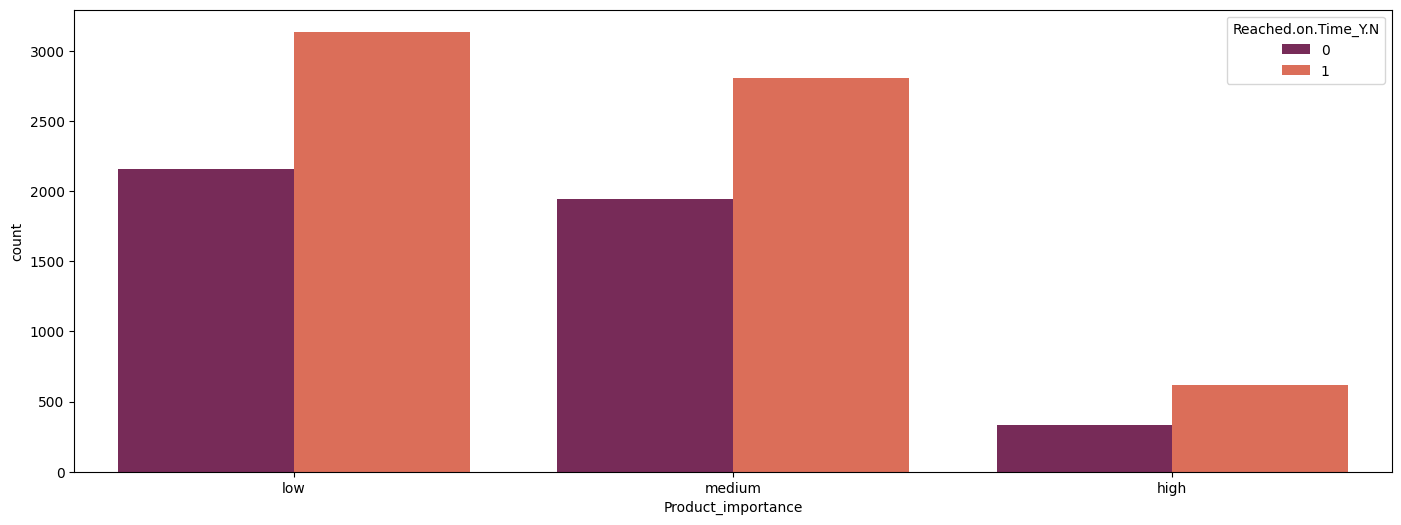

In [28]:
# Product importance Shipment on time
plt.figure(figsize = (17,6))
sns.countplot(data = df, x = 'Product_importance',
              hue = 'Reached.on.Time_Y.N', palette = 'rocket')
plt.show()

In [29]:
# Customer care call
integer_columns = df.select_dtypes(include = ['int64'])
print(integer_columns.head(3))
customer_care = integer_columns['Customer_care_calls'].value_counts().reset_index()
customer_care.columns = ['Customer_care_calls', 'value_counts']
fig = px.pie(customer_care, names = 'Customer_care_calls',
             values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu,
             width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

   ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0   1                    4                2                  177   
1   2                    4                5                  216   
2   3                    2                2                  183   

   Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                3                44           1233                    1  
1                2                59           3088                    1  
2                4                48           3374                    1  


In [30]:
# Customer Rating
integer_columns = df.select_dtypes(include = ['int64'])
print(integer_columns.head(3))
customer_ratings = integer_columns['Customer_rating'].value_counts().reset_index()
customer_ratings.columns = ['Customer_rating', 'value_counts']
fig = px.pie(customer_ratings, names = 'Customer_rating',
             values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.RdBu,
             width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

   ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0   1                    4                2                  177   
1   2                    4                5                  216   
2   3                    2                2                  183   

   Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                3                44           1233                    1  
1                2                59           3088                    1  
2                4                48           3374                    1  


In [31]:
# Which warehouse contains most weights
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100,
             color = 'Warehouse_block', marginal = 'box')
# C has bigger median and F has bigger outlier

In [32]:
ware_block_weight = df.groupby(
    ['Warehouse_block'])['Weight_in_gms'].sum().reset_index()
ware_block_weight
# seems F overloaded and made the shippment delay

,Warehouse_block,Weight_in_gms
0,A,6627118
1,B,6664240
2,C,6674560
3,D,6655305
4,F,13349327


In [35]:
# Customer call and Weight in grams
px.box(x = 'Customer_care_calls', y = 'Weight_in_gms',
       data_frame = df, color = 'Reached.on.Time_Y.N')
# seems the lighter weight product, the more freqently to call,
# the light parcel shipping team may be overloaded

In [36]:
# Product cost and Customer call on time shipment
px.box(x = 'Customer_care_calls', y = 'Cost_of_the_Product',
       data_frame = df, color = 'Reached.on.Time_Y.N')
# seems product cost higher than 200, customer need to call 6 times
# to ensure the shipment on time

<Axes: xlabel='Discount_offered', ylabel='Cost_of_the_Product'>

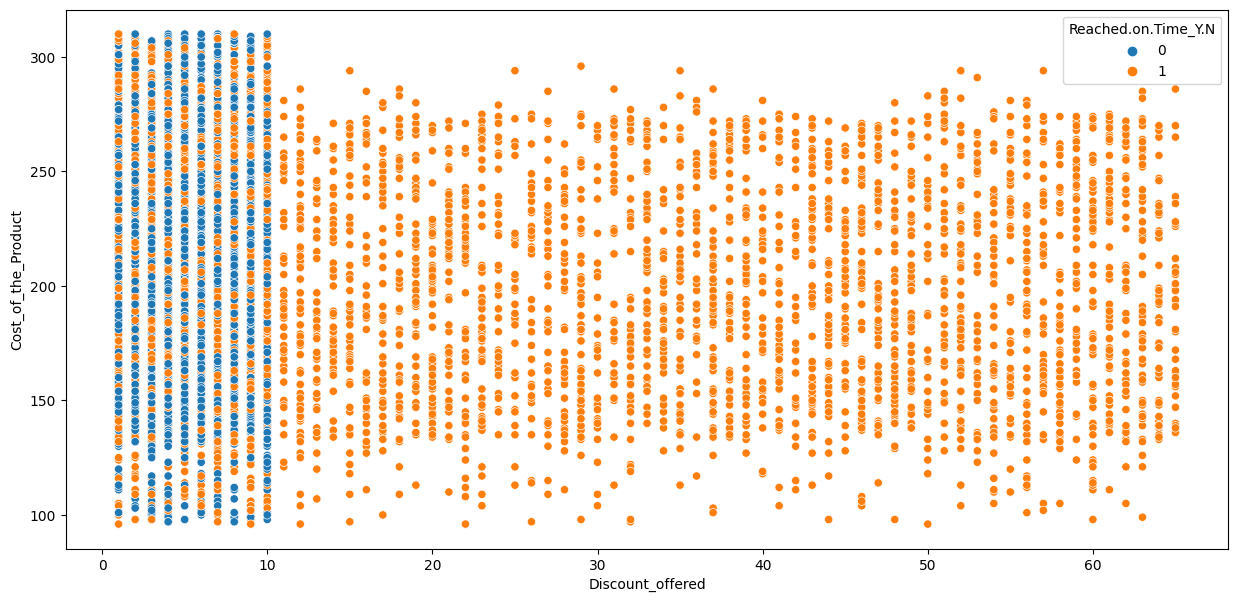

In [37]:
# Product cost and Discount on Shipment on time
plt.figure(figsize = (15,7))
sns.scatterplot(x = 'Discount_offered', y = 'Cost_of_the_Product',
                data = df, hue = 'Reached.on.Time_Y.N')
plt.show()
# discount over 10%, the shipment is 100% late
# may be the discount is used to compensate the late shippment

In [ ]:
cols = ['Warehouse_block','Mode_of_Shipment',
       'Customer_care_calls','Customer_rating', 
       'Prior_purchases','Product_importance',
       'Gender','Reached.on.Time_Y.N']

In [34]:
a=522/2 
b=382/2 
c=826/4 
d=1028/6 
print(a,b,c,d)

261.0 191.0 206.5 171.33333333333334
